## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Look at the data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Look at the data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


In [6]:
# Display the data table for preview
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
number_of_mice = len(study_data_complete['Mouse ID'].unique())
number_of_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = study_data_complete[study_data_complete.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mouse['Mouse ID'].unique()


array(['g989'], dtype=object)

In [9]:
duplicate_mouse_name = duplicate_mouse['Mouse ID'].unique()[0]
duplicate_mouse_name

'g989'

In [10]:
# Just the duplicated data
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_complete[study_data_complete['Mouse ID'] == duplicate_mouse_name]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete[study_data_complete['Mouse ID'] != duplicate_mouse_name]
cols = study_data_clean.columns
study_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
# And checking to see that our duplicate mouse is gone...
study_data_clean[study_data_clean['Mouse ID'] == duplicate_mouse_name]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [14]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(study_data_clean['Mouse ID'].unique())
number_of_mice_clean

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_result = study_data_clean.groupby('Drug Regimen')

drug_regimens = pd.DataFrame(drug_result['Tumor Volume (mm3)'].mean()).rename(columns={'Tumor Volume (mm3)':"Mean Tumor Volume"})
drug_regimens['Median Tumor Volume'] = drug_result['Tumor Volume (mm3)'].median()
drug_regimens['Tumor Volume Variance'] = drug_result['Tumor Volume (mm3)'].var()
drug_regimens['Tumor Volume Std. Dev.'] = drug_result['Tumor Volume (mm3)'].std()
drug_regimens['Tumor Volume Std. Err.'] = drug_result['Tumor Volume (mm3)'].sem()
drug_regimens


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimens_quick = study_data_clean[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std','sem'])
drug_regimens_quick




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_drug = study_data_clean[['Mouse ID', 'Drug Regimen']].groupby('Drug Regimen').count().sort_values('Mouse ID', ascending = False).rename(columns={'Mouse ID':"Number of Unique Mice Tested"})
mice_per_drug

,Number of Unique Mice Tested
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


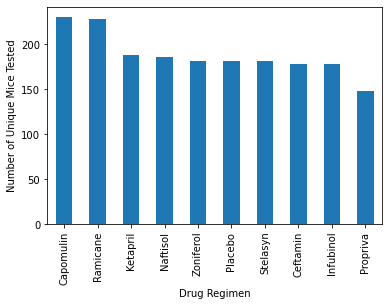

<Figure size 432x288 with 0 Axes>

In [18]:
mice_per_drug.plot(kind='bar', legend = False).set_ylabel('Number of Unique Mice Tested')
plt.show()
plt.tight_layout()


In [19]:
mice_per_drug = mice_per_drug.reset_index()
mice_per_drug

,Drug Regimen,Number of Unique Mice Tested
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


Text(0, 0.5, 'Number of Unique Mice Tested')

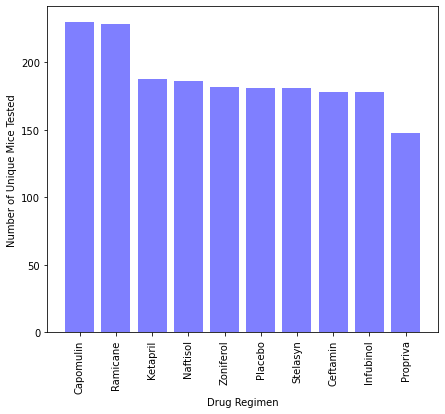

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(mice_per_drug))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7,6))
plt.bar(x_axis, mice_per_drug["Number of Unique Mice Tested"], alpha=0.5, color = 'blue', align="center")
plt.xticks(tick_locations, mice_per_drug["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

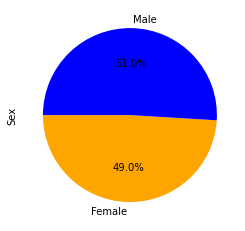

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# I think the following commented code is technically correct, because it counts unique
# mice, not mice by data point.  The homework solution actually counts mice by data point.
# I'm including the code for reference, but in order to be consistent with the grading rubric,
# I'm going to work with mice count by data point.

#unique_mice = study_data_clean.drop_duplicates(subset = 'Mouse ID', keep = 'first')
#mouse_gender_distribution = unique_mice[['Mouse ID', 'Sex']].groupby('Sex').count()
#total_mice = mouse_gender_distribution['Mouse ID'].sum()
#mouse_gender_distribution['% Sex'] = (mouse_gender_distribution['Mouse ID'] / total_mice).map("{:.2%}".format)
#mouse_gender_distribution

mouse_gender_distribution = study_data_clean[['Mouse ID', 'Sex']].groupby('Sex').count()
total_mice = mouse_gender_distribution['Mouse ID'].sum()
mouse_gender_distribution['% Sex'] = (mouse_gender_distribution['Mouse ID'] / total_mice)
mouse_gender_distribution

# Use DataFrame.plot() in order to create a bar chart of the data
mouse_gender_distribution.plot(kind = 'pie', y='% Sex', label='Sex', autopct='%1.1f%%', startangle=180, colors = ['orange', 'blue'], legend = None)
plt.show()
plt.tight_layout()


In [22]:
mouse_gender_distribution.reset_index(inplace=True)
mouse_gender_distribution

,Sex,Mouse ID,% Sex
0,Female,922,0.490426
1,Male,958,0.509574


Text(0.0, 1.0, 'Sex')

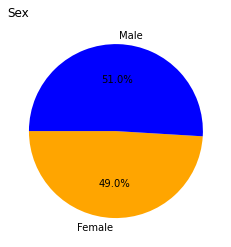

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_gender_distribution['Sex']
portions = mouse_gender_distribution['Mouse ID']
plt.pie(portions, labels=labels, autopct="%1.1f%%", startangle=180, colors = ['orange', 'blue'])
plt.title(label="Sex", loc="left")


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_df = study_data_clean.loc[study_data_clean['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
max_df = drug_df.groupby('Mouse ID')['Timepoint'].max()
max_df.reset_index()
max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_regimens_df = pd.merge(drug_df, max_df, on=['Mouse ID','Timepoint'])
last_regimens_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [26]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
treatments = []

box_lists = last_regimens_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
box_df = pd.DataFrame(box_lists)
box_df.reset_index(inplace = True)

for column in box_df['Drug Regimen']:
    treatments.append(column)

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in treatments:
    df = last_regimens_df.loc[(last_regimens_df['Drug Regimen'] == drug)]
    volumes = df['Tumor Volume (mm3)']  
    
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = [vol for vol in volumes if vol < lower_bound or vol > upper_bound]
    if len(outliers) == 0:
        print(f'Number of {drug} potential outliers : {len(outliers)}')
    else:
        print(f'Number of {drug} potential outliers: {len(outliers)} which has a volume of {outliers} mm3')


Number of Capomulin potential outliers : 0
Number of Ceftamin potential outliers : 0
Number of Infubinol potential outliers: 1 which has a volume of [36.321345799999996] mm3
Number of Ramicane potential outliers : 0


<function matplotlib.pyplot.show(*args, **kw)>

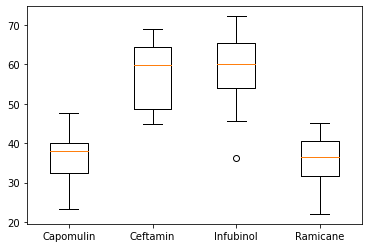

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_lists = last_regimens_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
box_df = pd.DataFrame(box_lists)
box_df.reset_index(inplace = True)

volumes = [vol for vol in box_df['Tumor Volume (mm3)']]
plt.boxplot(volumes, labels=treatments)
plt.show

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

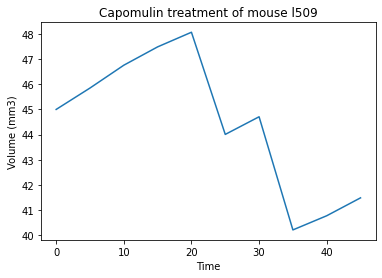

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_vs_tumor_df = study_data_clean.loc[study_data_clean["Mouse ID"]=="l509"]
time = np.arange(0,50,5)
volume = time_vs_tumor_df['Tumor Volume (mm3)']
plt.plot(time, volume)
plt.xlabel("Time")
plt.ylabel("Volume (mm3)")
plt.title('Capomulin treatment of mouse l509')

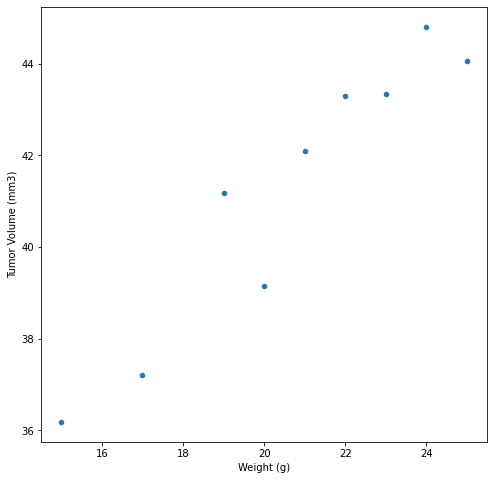

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
volume_vs_weight_df = study_data_clean.loc[study_data_clean["Drug Regimen"]=="Capomulin"]
volume_vs_weight_df = pd.DataFrame(volume_vs_weight_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean())
volume_vs_weight_df.reset_index(inplace=True)
capomulin_scatter = volume_vs_weight_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', figsize= (8,8))

## Correlation and Regression

The correlation between both factors is 0.95


Text(0, 0.5, 'Tumor Volume (mm3)')

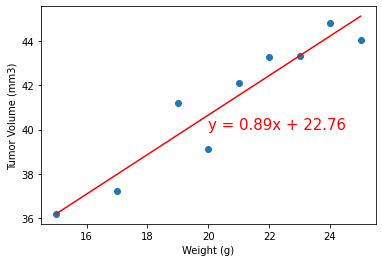

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = volume_vs_weight_df.iloc[:,0]
volume = volume_vs_weight_df.iloc[:,1]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")